# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.1'

In [2]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [3]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model,Standard
0,KA79_c325_a2_FIC,104.092987,0.014132,1283.724190,0.012914,174.211519,1283.724190,545.179483,1.223550,2.280667,...,1.020429,0.088245,0.014047,1.183628,1.123867,0.303869,0.004116,PseudoVoigtModel,PseudoVoigtModel,No
1,KA79_c329_a1_FIA,103.404384,0.014606,1285.376384,0.013332,128.045262,1285.376384,230.523769,0.659571,2.349096,...,1.232000,0.331588,0.010302,1.093842,1.118721,0.099057,0.004291,PseudoVoigtModel,PseudoVoigtModel,No
2,KA79_c331_a1_FIA_r1,103.822421,0.038133,1284.387131,0.036043,60.963606,1284.387131,176.270885,1.005855,1.927377,...,1.355783,0.831186,0.032999,1.058559,1.027687,0.087786,0.011800,PseudoVoigtModel,PseudoVoigtModel,No
3,KA79_c331_a1_FIA_r2_CRR_DiadFit,103.840731,0.037064,1284.370766,0.035092,55.127365,1284.370766,162.113998,1.071543,1.476528,...,1.172414,0.150266,0.038875,1.206311,1.242531,0.313029,0.012215,PseudoVoigtModel,PseudoVoigtModel,No
4,KA79_c331_a1_FIA_r3,103.864656,0.044120,1284.354015,0.041894,50.415127,1284.354015,140.285597,0.990806,2.166204,...,1.545600,1.169614,0.039306,1.033040,1.072391,0.049456,0.013857,PseudoVoigtModel,PseudoVoigtModel,No


## First, get the metadata for this day

In [4]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'NE', 'Si', 'nodiad', 'Ne', 'Cap','window','Video', 'nodiad','diad','Series','no_diad','diad','Series','unquant','map','Series'],
 sort=True)
diad_meta[0]

'04 FG04-A1-4-start-r1.txt'

## Now get all the important information out of the metadata files

In [5]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

  0%|          | 0/73 [00:00<?, ?it/s]

100%|██████████| 73/73 [00:04<00:00, 16.61it/s]


Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,FG04-A1-4-start-r1.txt,"December 16, 2024\n",December,16.0,6.042,45.0,5.0,50.0,"['0h', '3m', '46s']",11:06:03 AM\n,39963.0,1324.964
1,FG04-A1-4-start-r2.txt,"December 16, 2024\n",December,16.0,6.042,45.0,5.0,50.0,"['0h', '3m', '46s']",11:11:25 AM\n,40285.0,1324.964
2,FG04-A1-4-start-r3.txt,"December 16, 2024\n",December,16.0,6.034,45.0,5.0,50.0,"['0h', '3m', '46s']",11:16:29 AM\n,40589.0,1324.964
3,KA79_c325_a2_FIA.txt,"December 16, 2024\n",December,16.0,6.001,60.0,4.0,50.0,"['0h', '4m', '2s']",12:16:38 PM\n,44198.0,1324.964
4,KA79_c325_a2_FIB.txt,"December 16, 2024\n",December,16.0,6.019,60.0,4.0,100.0,"['0h', '4m', '1s']",12:22:25 PM\n,44545.0,1324.964


## Then get a simple file name you can stitch with the spectra

In [6]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'FG04-A1-4-start-r1'

In [7]:
for i in range(len(file_m)):
    file_m[i] = file_m[i].replace("--Information", "")
file_m

array(['FG04-A1-4-start-r1', 'FG04-A1-4-start-r2', 'FG04-A1-4-start-r3',
       'KA79_c325_a2_FIA', 'KA79_c325_a2_FIB', 'KA79_c325_a2_FIC',
       'KA79_c325_a2_FID', 'KA79_c327_a2_FIB', 'KA79_c327_a1_FIC',
       'KA79_c329_a1_FIA', 'KA79_c330_a1_FIA', 'KA79_c331_a1_FIA_r1',
       'KA79_c331_a1_FIA_r2', 'KA79_c331_a1_FIA_r3', 'KA79_c331_a2_FIB',
       'KA79_c331_a3_FIC', 'KA79_c331_a3_FID', 'KA69_c338_a1_FIA',
       'KA69_c340_a1_FIA', 'KA69_c341_a1_FIA', 'KA69_c342_a1_FIA',
       'FG04-A1-4-end-r4', 'FG04-A1-4-end-r5', 'FG04-A1-4-end-r6'],
      dtype=object)

## Now get filename from spectra into same form as metadata

In [8]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
KA79_c325_a2_FIC


In [9]:
for i in range(len(file_s)):
    file_s[i] = file_s[i].replace("--Spec.Data 1", "")
file_s

array(['KA79_c325_a2_FIC', 'KA79_c329_a1_FIA', 'KA79_c331_a1_FIA_r1',
       'KA79_c331_a1_FIA_r2', 'KA79_c331_a1_FIA_r3', 'KA69_c338_a1_FIA',
       'KA69_c341_a1_FIA', 'KA79_c325_a2_FIA', 'KA79_c325_a2_FIB',
       'KA79_c325_a2_FID', 'KA79_c327_a2_FIB', 'KA79_c327_a1_FIC',
       'KA79_c330_a1_FIA', 'KA79_c331_a2_FIB', 'KA79_c331_a3_FIC',
       'KA79_c331_a3_FID', 'KA69_c340_a1_FIA', 'KA69_c342_a1_FIA',
       'FG04-A1-4-start-r1', 'FG04-A1-4-start-r2', 'FG04-A1-4-start-r3',
       'FG04-A1-4-end-r4', 'FG04-A1-4-end-r5', 'FG04-A1-4-end-r6'],
      dtype='<U19')

In [10]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,KA79_c325_a2_FIC,104.092987,0.014132,1283.724190,0.012914,174.211519,1283.724190,545.179483,1.223550,2.280667,...,December,16.0,5.993,60.0,4.0,100.0,"['0h', '4m', '1s']",12:30:22 PM\n,45022.0,1324.964
1,KA79_c329_a1_FIA,103.404384,0.014606,1285.376384,0.013332,128.045262,1285.376384,230.523769,0.659571,2.349096,...,December,16.0,10.007,60.0,4.0,50.0,"['0h', '4m', '2s']",2:04:00 PM\n,50640.0,1324.964
2,KA79_c331_a1_FIA_r1,103.822421,0.038133,1284.387131,0.036043,60.963606,1284.387131,176.270885,1.005855,1.927377,...,December,16.0,6.044,60.0,4.0,50.0,"['0h', '4m', '1s']",2:31:55 PM\n,52315.0,1324.964
3,KA79_c331_a1_FIA_r2,103.840731,0.037064,1284.370766,0.035092,55.127365,1284.370766,162.113998,1.071543,1.476528,...,December,16.0,6.016,60.0,4.0,50.0,"['0h', '4m', '1s']",2:37:04 PM\n,52624.0,1324.964
4,KA79_c331_a1_FIA_r3,103.864656,0.044120,1284.354015,0.041894,50.415127,1284.354015,140.285597,0.990806,2.166204,...,December,16.0,6.006,60.0,4.0,50.0,"['0h', '4m', '1s']",2:41:53 PM\n,52913.0,1324.964


## If you have secondary phases, now is the time to merge those in

In [11]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

Made a df!
good job, no duplicate file names


## If you have SO2, now is the time to calculate the molar proportion of SO2

In [12]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    

        SO2_mol_ratio=pf.calculate_SO2_CO2_ratio(SO2_area=df_combo_sec_phase['Peak_Area_SO2'], 
        diad1_area=df_combo_sec_phase['Diad1_Voigt_Area'], diad2_area=df_combo_sec_phase['Diad2_Voigt_Area'], 
                SO2_cross_sec=5.3, diad1_cross_sec=0.89, diad2_cross_sec=1.4)
        

        df_combo_sec_phase['SO2_mol_ratio']=SO2_mol_ratio

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [13]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

4.509797527298594e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2,Model_name,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
0,KA79_c325_a2_FIC,0.467117,0.006856,0.006440,0.002352,103.863586,0.014108,0.000458,0.014132,5.993,...,1150.134876,77.526815,54.815307,Spline,0.052776,0.022295,45022.0,0.997796,0.997792,0.997801
1,KA79_c329_a1_FIA,0.172398,0.006374,0.005916,0.002373,103.175527,0.014581,0.000454,0.014606,10.007,...,1150.694821,25.746542,20.348703,Spline,0.044196,0.018738,50640.0,0.997787,0.997782,0.997791
2,KA79_c331_a1_FIA_r1,0.346720,0.016625,0.016458,0.002349,103.592457,0.038051,0.000458,0.038133,6.044,...,NaN,NaN,NaN,NaN,NaN,NaN,52315.0,0.997785,0.997781,0.997789
3,KA79_c331_a1_FIA_r2,0.354622,0.016221,0.016050,0.002349,103.610697,0.036985,0.000458,0.037064,6.016,...,NaN,NaN,NaN,NaN,NaN,NaN,52624.0,0.997785,0.997780,0.997789
4,KA79_c331_a1_FIA_r3,0.364993,0.019334,0.019191,0.002349,103.634543,0.044024,0.000459,0.044120,6.006,...,NaN,NaN,NaN,NaN,NaN,NaN,52913.0,0.997784,0.997780,0.997789


In [14]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

4.509797527298594e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2,Model_name,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
0,KA79_c325_a2_FIC,0.467117,0.006856,0.006440,0.002352,103.863586,0.014108,0.000458,0.014132,5.993,...,1150.134876,77.526815,54.815307,Spline,0.052776,0.022295,45022.0,0.997796,0.997792,0.997801
1,KA79_c329_a1_FIA,0.172398,0.006374,0.005916,0.002373,103.175527,0.014581,0.000454,0.014606,10.007,...,1150.694821,25.746542,20.348703,Spline,0.044196,0.018738,50640.0,0.997787,0.997782,0.997791
2,KA79_c331_a1_FIA_r1,0.346720,0.016625,0.016458,0.002349,103.592457,0.038051,0.000458,0.038133,6.044,...,NaN,NaN,NaN,NaN,NaN,NaN,52315.0,0.997785,0.997781,0.997789
3,KA79_c331_a1_FIA_r2,0.354622,0.016221,0.016050,0.002349,103.610697,0.036985,0.000458,0.037064,6.016,...,NaN,NaN,NaN,NaN,NaN,NaN,52624.0,0.997785,0.997780,0.997789
4,KA79_c331_a1_FIA_r3,0.364993,0.019334,0.019191,0.002349,103.634543,0.044024,0.000459,0.044120,6.006,...,NaN,NaN,NaN,NaN,NaN,NaN,52913.0,0.997784,0.997780,0.997789


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [15]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_December 16, 2024_fitted_2024-12-18.xlsx


## This helps visualize the errors on each spectra 

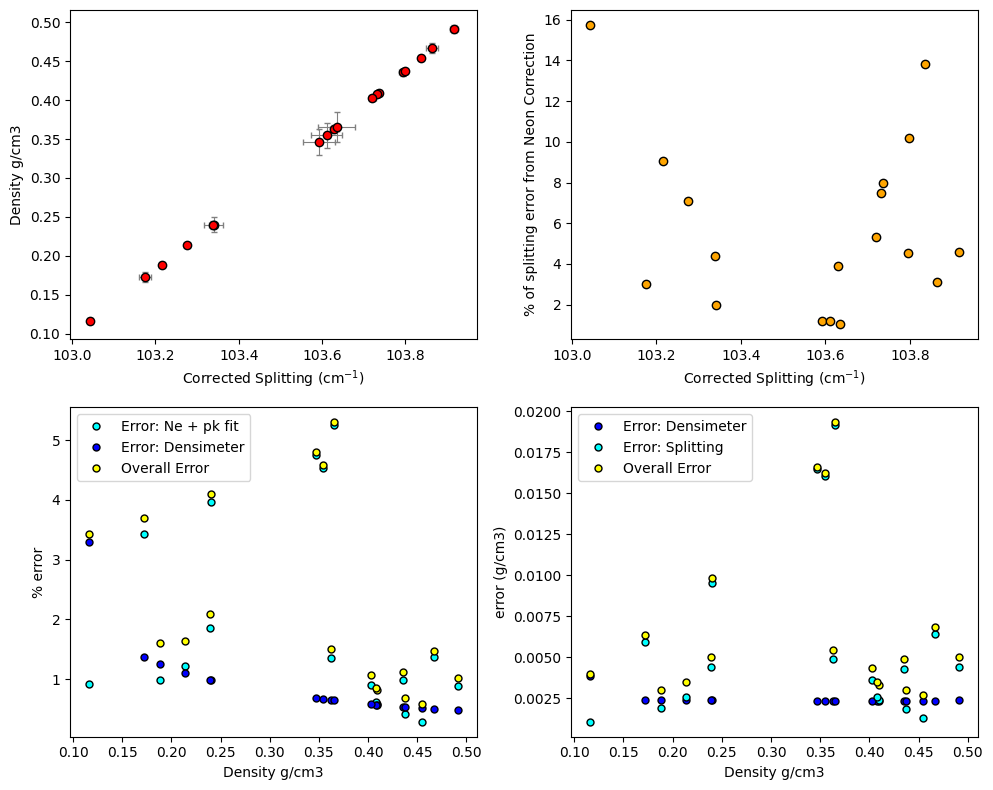

In [16]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

## lets look at standards


Text(0, 0.5, 'Density g/cm3')

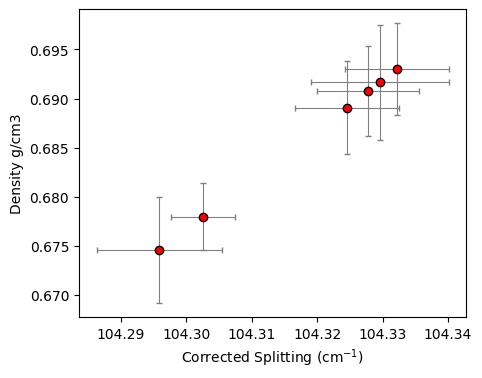

In [17]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5,4))
df=sorted_df.loc[ sorted_df['Standard']=='Yes']
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

In [18]:
df.to_clipboard(excel=True,index=False)

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

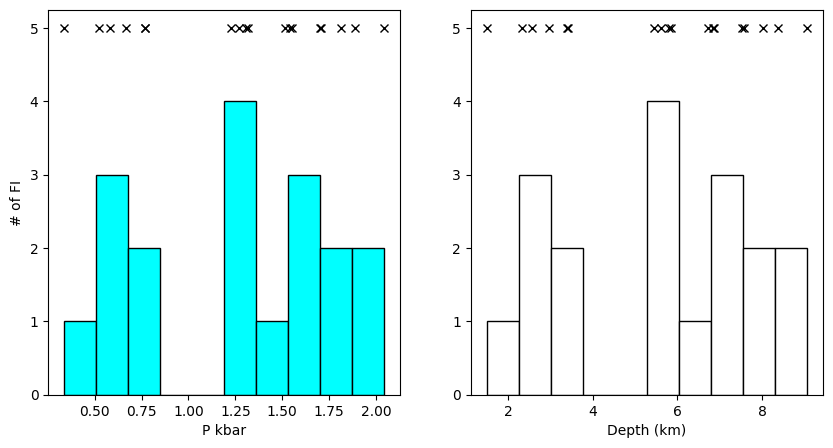

In [19]:
# Calculate pressure with a temperature estimate
Temp_C=1150
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')

In [20]:
import os

if os.name=="posix":

    def mac_notification(title, subtitle, message):
        """
        Display a macOS notification with the default sound using AppleScript.
        
        Args:
        - title: Title of the notification.
        - subtitle: Subtitle of the notification.
        - message: Main message content of the notification.
        """
        os.system("""
                osascript -e 'display notification "{}" with title "{}" subtitle "{}" sound name "default"'
                """.format(message, title, subtitle))

    mac_notification("Notebook Completed", "VSCode", "Step4 Stitch outputs")

else:

    # %pip install winotify

    from winotify import Notification, audio

    toast= Notification(app_id="VSCode",title="Notebook completed",
                        msg="Step4 Stitch outputs is done!",
                        duration="short")
    toast.set_audio(audio.Mail,loop=False)
    toast.show()